In [35]:
import torch, torchvision
from torch import nn
from torch import optim
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
import copy
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import requests
from PIL import Image
from io import BytesIO


In [21]:
number_batch = 64

In [22]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
val_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = number_batch)
val_dl = torch.utils.data.DataLoader(val_data, batch_size = number_batch)

In [23]:
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.MNIST('mnist_data', train=True, download=True, transform=T)
val_data = torchvision.datasets.MNIST('mnist_data', train=False, download=True, transform=T)

train_dl = torch.utils.data.DataLoader(train_data, batch_size = number_batch)
val_dl = torch.utils.data.DataLoader(val_data, batch_size = number_batch)

In [24]:
train_data[0][0][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

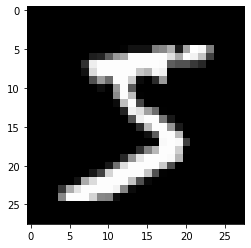

In [45]:
plt.imshow(train_data[0][0][0], cmap="gray")

In [26]:
def create_lenet():
    model = nn.Sequential(
        nn.Conv2d(1, 6, 5, padding=2),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5, padding=0),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2),
        nn.Flatten(),
        nn.Linear(400, 120),
        nn.ReLU(),
        nn.Linear(120, 84),
        nn.ReLU(),
        nn.Linear(84, 10)
    )
    return model

In [27]:
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total

In [28]:
def train(number_epoch=3, lr=1e-3, device="cpu"):
    accuracies = []
    cnn = create_lenet().to(device)
    cec = nn.CrossEntropyLoss()
    optimizer = optim.Adam(cnn.parameters(), lr=lr)
    max_accuracy = 0
    
    for epoch in range(number_epoch):
        for i, (images, labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            pred = cnn(images)
            loss = cec(pred, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(cnn, val_dl))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(cnn)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    return best_model

In [29]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
    print("No Cuda Available")

In [30]:
device

device(type='cuda', index=0)

Saving Best Model with Accuracy:  95.56999969482422
Epoch: 1 Accuracy : 95.56999969482422 %
Saving Best Model with Accuracy:  97.36000061035156
Epoch: 2 Accuracy : 97.36000061035156 %
Saving Best Model with Accuracy:  97.9000015258789
Epoch: 3 Accuracy : 97.9000015258789 %
Saving Best Model with Accuracy:  98.06999969482422
Epoch: 4 Accuracy : 98.06999969482422 %
Saving Best Model with Accuracy:  98.44999694824219
Epoch: 5 Accuracy : 98.44999694824219 %
Saving Best Model with Accuracy:  98.77999877929688
Epoch: 6 Accuracy : 98.77999877929688 %
Epoch: 7 Accuracy : 98.62999725341797 %
Epoch: 8 Accuracy : 98.76000213623047 %
Saving Best Model with Accuracy:  98.91000366210938
Epoch: 9 Accuracy : 98.91000366210938 %
Epoch: 10 Accuracy : 98.61000061035156 %
Epoch: 11 Accuracy : 98.8499984741211 %
Saving Best Model with Accuracy:  99.0
Epoch: 12 Accuracy : 99.0 %
Epoch: 13 Accuracy : 98.8499984741211 %
Epoch: 14 Accuracy : 98.87000274658203 %
Saving Best Model with Accuracy:  99.099998474121

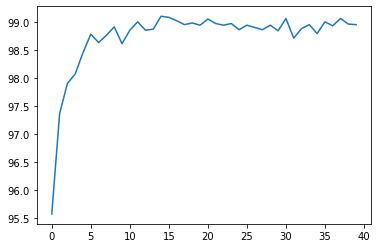

In [31]:
lenet = train(40, device=device)

In [32]:
def predict_dl(model, data):
    y_pred = []
    y_true = []
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        y_pred.extend(list(pred.numpy()))
        y_true.extend(list(labels.numpy()))
    return np.array(y_pred), np.array(y_true)

In [33]:
y_pred, y_true = predict_dl(lenet, val_dl)

In [34]:
pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0,10)))

,0,1,2,3,4,5,6,7,8,9
0,979,0,0,0,0,0,0,0,0,1
1,0,1133,1,0,0,0,1,0,0,0
2,0,0,1029,0,1,0,0,2,0,0
3,0,0,2,1000,0,1,0,6,0,1
4,0,0,1,0,970,0,0,0,0,11
5,2,0,0,11,0,876,1,0,1,1
6,4,2,0,1,1,4,943,0,3,0
7,0,2,4,0,0,0,0,1019,2,1
8,2,0,5,1,0,1,0,2,958,5
9,0,0,0,0,1,2,0,1,2,1003


In [36]:
def inference(path, model, device):
    r = requests.get(path)
    with BytesIO(r.content) as f:
        img = Image.open(f).convert(mode="L")
        img = img.resize((28, 28))
        x = (255 - np.expand_dims(np.array(img), -1))/255.
    with torch.no_grad():
        pred = model(torch.unsqueeze(T(x), axis=0).float().to(device))
        return F.softmax(pred, dim=-1).cpu().numpy()

In [37]:
path = "https://previews.123rf.com/images/aroas/aroas1704/aroas170400068/79321959-handwritten-sketch-black-number-8-on-white-background.jpg"
r = requests.get(path)
with BytesIO(r.content) as f:
    img = Image.open(f).convert(mode="L")
    img = img.resize((28, 28))
x = (255 - np.expand_dims(np.array(img), -1))/255.

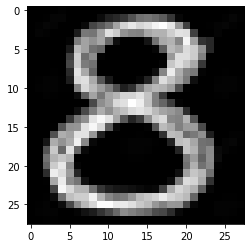

In [38]:
plt.imshow(x.squeeze(-1), cmap="gray")

In [40]:
pred = inference(path, lenet, device=device)
pred_idx = np.argmax(pred)
print(f"Predicted: {pred_idx}, Prob: {pred[0][pred_idx]*100} %")

Predicted: 3, Prob: 99.98063445091248 %


In [41]:
pred


array([[1.6865410e-14, 2.0069334e-05, 2.5996908e-06, 9.9980634e-01,
        1.2012552e-07, 4.8605452e-06, 4.5326607e-12, 9.2442258e-09,
        1.6599444e-04, 9.7151771e-09]], dtype=float32)

In [42]:
path = "https://thumbs.dreamstime.com/z/handwritten-sketch-black-number-white-background-90805304.jpg"
r = requests.get(path)
with BytesIO(r.content) as f:
    img = Image.open(f).convert(mode="L")
    img = img.resize((28, 28))
x = (255 - np.expand_dims(np.array(img), -1))/255.

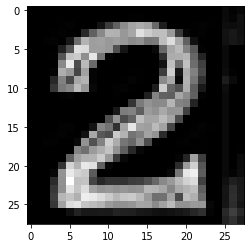

In [43]:
plt.imshow(x.squeeze(-1), cmap="gray")

In [44]:
pred = inference(path, lenet, device=device)
pred_idx = np.argmax(pred)
print(f"Predicted: {pred_idx}, Prob: {pred[0][pred_idx]*100} %")

Predicted: 2, Prob: 99.73000884056091 %
